In [2]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.formula.api as sm
import numpy as np
    
import matplotlib.pyplot as plt

In [3]:
def check_assumptions(df,var):
    # Gettin summary statistics
    print(rp.summary_cont(df[var]))
    # Build ANOVA model 
    ols_resid = sm.ols(var+'~ group',data = df).fit()
    # Test assumption of normality for residuals 
    print(stats.shapiro(ols_resid.resid))
    # Test homogeneity of Variance test
    print(stats.levene(df[var][df['group'] == 'tg'], df[var][df['group'] == 'wt']))


## Load general locomotion data and filter to day 1

In [41]:
# Loading data
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path + 'general_locomotion.csv')
df = df[df.day=='D1']
df


,subID,group,day,path_length,median_velocity,median_abs_acceleration,median_abs_angular_velocity,search_area,thigmotaxis
0,Tg102_D1,tg,D1,2863.691398,4.315799,13.456118,21.849311,0.123292,37.933333
2,Tg103_D1,tg,D1,2577.246876,4.303752,13.776957,6.687920,0.035592,342.733333
4,Tg104_D1,tg,D1,2571.390321,4.250983,13.196852,7.470793,0.074317,1774.233333
6,Tg105_D1,tg,D1,4231.298992,4.649838,14.660602,6.847991,0.052392,70.033333
8,Tg106_D1,tg,D1,2125.159344,4.514121,13.530253,8.800542,0.091116,1666.466667
10,Tg108_D1,tg,D1,4065.886556,4.758683,15.194739,7.896055,0.194191,999.000000
12,Tg109_D1,tg,D1,4012.926378,4.690150,14.952556,7.150948,0.159453,467.300000
14,Tg110_D1,tg,D1,4341.622111,4.825915,14.979580,7.546775,0.156036,1771.066667
16,Tg111_D1,tg,D1,4950.235597,4.663225,15.042217,6.489288,0.150342,1430.833333
18,Tg112_D1,tg,D1,4799.565241,4.606794,14.765441,7.352037,0.177392,735.266667


## Check assumptions for all measures

In [4]:
temp_df = df.loc[:,'path_length':'thigmotaxis']

for value in temp_df.keys():
    check_assumptions(df,value)



      Variable     N       Mean         SD        SE  95% Conf.   Interval
0  path_length  24.0  3693.0967  1224.6449  249.9796  3175.9745  4210.2189
ShapiroResult(statistic=0.9634643197059631, pvalue=0.5118638873100281)
LeveneResult(statistic=0.07939800009078543, pvalue=0.7807484464721357)
KruskalResult(statistic=0.05333333333332746, pvalue=0.8173613313851867)


          Variable     N    Mean      SD      SE  95% Conf.  Interval
0  median_velocity  24.0  4.5002  0.2584  0.0527     4.3911    4.6093
ShapiroResult(statistic=0.9855751991271973, pvalue=0.972862720489502)
LeveneResult(statistic=0.06408236558201089, pvalue=0.8025066958729152)
KruskalResult(statistic=1.0799999999999983, pvalue=0.29869755599496756)


                  Variable     N   Mean      SD      SE  95% Conf.  Interval
0  median_abs_acceleration  24.0  14.25  1.1455  0.2338    13.7663   14.7337
ShapiroResult(statistic=0.9251805543899536, pvalue=0.07610534131526947)
LeveneResult(statistic=0.03507198939771977, pvalue=

## Run OLS for Path Length

In [5]:
ols_resid = sm.ols('path_length~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:            path_length   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                  0.005569
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.941
Time:                        14:30:17   Log-Likelihood:                -204.19
No. Observations:                  24   AIC:                             412.4
Df Residuals:                      22   BIC:                             414.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3712.1690    361.424     10.271      

## Run OLS for Median Velocity

In [6]:
ols_resid = sm.ols('median_velocity ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:        median_velocity   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9343
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.344
Time:                        14:30:25   Log-Likelihood:               -0.56645
No. Observations:                  24   AIC:                             5.133
Df Residuals:                      22   BIC:                             7.489
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.5512      0.075     60.927      

## Run OLS for Median Absolute Acceleration 

In [7]:
ols_resid = sm.ols('median_abs_acceleration ~ group',data = df).fit()
print(ols_resid.summary())

                               OLS Regression Results                              
Dep. Variable:     median_abs_acceleration   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                 -0.044
Method:                      Least Squares   F-statistic:                   0.03717
Date:                     Wed, 27 Jan 2021   Prob (F-statistic):              0.849
Time:                             14:30:30   Log-Likelihood:                -36.784
No. Observations:                       24   AIC:                             77.57
Df Residuals:                           22   BIC:                             79.92
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


## Run KS for Median Absolute Angular Velocity

In [43]:
x = df['median_abs_angular_velocity'][df['group'] == 'tg']
y = df['median_abs_angular_velocity'][df['group'] == 'wt']
stats.kruskal(df['median_abs_angular_velocity'][df['group'] == 'tg'], df['median_abs_angular_velocity'][df['group'] == 'wt'])

KruskalResult(statistic=0.75, pvalue=0.3864762307712325)

## Run KS-test for Search Area

In [42]:
x = df['search_area'][df['group'] == 'tg']
y = df['search_area'][df['group'] == 'wt']

stats.kruskal(df['search_area'][df['group'] == 'tg'], df['search_area'][df['group'] == 'wt'])

KruskalResult(statistic=1.4699999999999989, pvalue=0.22534569370166357)

In [44]:
ols_resid = sm.ols('thigmotaxis ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:            thigmotaxis   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.4991
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.487
Time:                        14:40:11   Log-Likelihood:                -187.46
No. Observations:                  24   AIC:                             378.9
Df Residuals:                      22   BIC:                             381.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     985.7250    179.973      5.477      

## Load general locomotion data and filter to day 2


In [45]:
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path + 'general_locomotion.csv')
df = df[df.day=='D2']
df


,subID,group,day,path_length,median_velocity,median_abs_acceleration,median_abs_angular_velocity,search_area,thigmotaxis
1,Tg102_D2,tg,D2,1332.769927,3.989007,12.453811,7.864080,0.028189,1780.666667
3,Tg103_D2,tg,D2,2020.260394,4.247105,13.713404,8.268040,0.072608,1736.166667
5,Tg104_D2,tg,D2,1448.005133,3.970336,12.078644,8.565091,0.040718,1785.766667
7,Tg105_D2,tg,D2,4160.301260,4.553739,14.299449,7.290135,0.222380,1704.133333
9,Tg106_D2,tg,D2,1423.288031,4.087516,12.480729,6.334668,0.042711,1759.433333
11,Tg108_D2,tg,D2,2773.586320,4.207099,12.832268,7.623487,0.063497,1787.600000
13,Tg109_D2,tg,D2,2747.062430,4.484876,14.661684,7.027309,0.128986,1775.100000
15,Tg110_D2,tg,D2,3250.700478,4.419708,13.396888,5.376270,0.121014,1788.533333
17,Tg111_D2,tg,D2,8970.264532,5.959488,18.747033,6.595489,0.380410,1713.000000
19,Tg112_D2,tg,D2,5685.595073,4.604238,14.631623,6.006712,0.268793,1773.333333


### check assumptions

In [46]:
temp_df = df.loc[:,'path_length':'thigmotaxis']

for value in temp_df.keys():
    check_assumptions(df,value)



      Variable     N       Mean        SD        SE  95% Conf.   Interval
0  path_length  24.0  3238.4085  1898.969  387.6254  2436.5442  4040.2728
ShapiroResult(statistic=0.8634651899337769, pvalue=0.0039278543554246426)
LeveneResult(statistic=0.14077592325115418, pvalue=0.7111038405076195)
KruskalResult(statistic=0.3333333333333428, pvalue=0.5637028616507676)


          Variable     N    Mean      SD      SE  95% Conf.  Interval
0  median_velocity  24.0  4.3828  0.4747  0.0969     4.1823    4.5832
ShapiroResult(statistic=0.7922394871711731, pvalue=0.00022055635054130107)
LeveneResult(statistic=0.12463922945317558, pvalue=0.7274166077122561)
KruskalResult(statistic=0.030000000000001137, pvalue=0.862490230135919)


                  Variable     N     Mean      SD      SE  95% Conf.  Interval
0  median_abs_acceleration  24.0  13.7222  1.7884  0.3651     12.967   14.4774
ShapiroResult(statistic=0.8905545473098755, pvalue=0.013647104613482952)
LeveneResult(statistic=0.0453400359151245

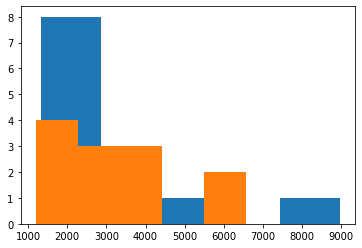

In [14]:
x = df['path_length'][df['group'] == 'tg']
y = df['path_length'][df['group'] == 'wt']

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

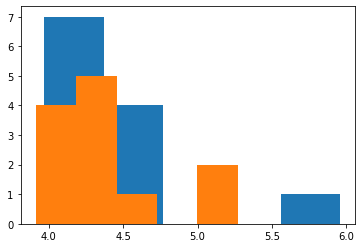

In [15]:
x = df['median_velocity'][df['group'] == 'tg']
y = df['median_velocity'][df['group'] == 'wt']

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

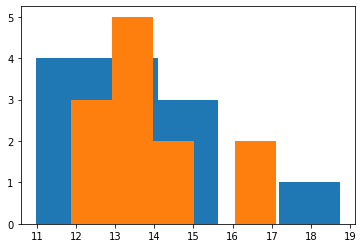

In [16]:
x = df['median_abs_acceleration'][df['group'] == 'tg']
y = df['median_abs_acceleration'][df['group'] == 'wt']

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

In [17]:
ols_resid = sm.ols('median_abs_angular_velocity ~ group',data = df).fit()
print(ols_resid.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_abs_angular_velocity   R-squared:                       0.014
Model:                                     OLS   Adj. R-squared:                 -0.031
Method:                          Least Squares   F-statistic:                    0.3087
Date:                         Wed, 27 Jan 2021   Prob (F-statistic):              0.584
Time:                                 14:31:36   Log-Likelihood:                -28.561
No. Observations:                           24   AIC:                             61.12
Df Residuals:                               22   BIC:                             63.48
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

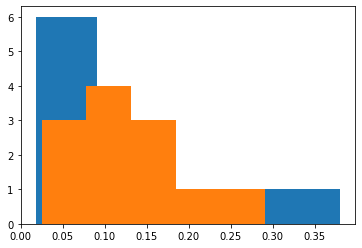

In [18]:
x = df['search_area'][df['group'] == 'tg']
y = df['search_area'][df['group'] == 'wt']

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

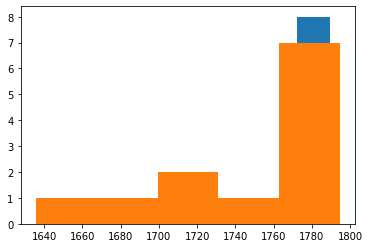

In [19]:
x = df['thigmotaxis'][df['group'] == 'tg']
y = df['thigmotaxis'][df['group'] == 'wt']

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

# Load movement epoch data and filter to day 1

In [48]:
fig_save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'movement_epochs.csv')
df = df[df.day=='D1']
df

,subID,group,day,circuity,num_runs,run_length,proximity_cue,median_peak_vel,median_duration,median_inter_run_interval
0,Tg102_D1,tg,D1,0.474414,8,147.725887,103.985545,7.231567,13.383333,28.600000
2,Tg103_D1,tg,D1,0.130543,12,61.521274,10.157918,2.814024,10.500000,79.033333
4,Tg104_D1,tg,D1,0.444387,5,72.287602,161.700049,3.500167,14.600000,312.883333
6,Tg105_D1,tg,D1,0.052930,10,87.243854,8.467477,3.485482,16.383333,107.233333
8,Tg106_D1,tg,D1,0.512846,20,40.099846,159.078851,2.993030,7.883333,18.400000
10,Tg108_D1,tg,D1,0.531371,14,63.159694,119.917446,3.715448,6.733333,43.133333
12,Tg109_D1,tg,D1,0.472494,21,62.211167,9.086548,3.475323,8.133333,26.350000
14,Tg110_D1,tg,D1,0.536503,16,136.695607,163.154740,4.493242,16.100000,24.700000
16,Tg111_D1,tg,D1,0.058132,11,91.936696,9.696960,4.250462,11.066667,92.016667
18,Tg112_D1,tg,D1,0.677138,17,101.513822,93.031679,4.892375,9.500000,15.200000


### Check assumptions

In [49]:
temp_df = df.loc[:,'circuity':'median_inter_run_interval']

for value in temp_df.keys():
    check_assumptions(df,value)



   Variable     N    Mean      SD      SE  95% Conf.  Interval
0  circuity  24.0  0.3641  0.2003  0.0409     0.2795    0.4487
ShapiroResult(statistic=0.9274245500564575, pvalue=0.08539377152919769)
LeveneResult(statistic=0.001267727796815351, pvalue=0.9719182818166151)


   Variable     N     Mean      SD      SE  95% Conf.  Interval
0  num_runs  24.0  12.2083  5.2749  1.0767      9.981   14.4357
ShapiroResult(statistic=0.9697288274765015, pvalue=0.6602910757064819)
LeveneResult(statistic=1.3317972350230418, pvalue=0.26086882733233707)


     Variable     N     Mean       SD      SE  95% Conf.  Interval
0  run_length  24.0  87.1754  37.4615  7.6468    71.3568  102.9939
ShapiroResult(statistic=0.8806913495063782, pvalue=0.008580918423831463)
LeveneResult(statistic=0.18327872796194833, pvalue=0.6727325437105929)


        Variable     N     Mean       SD       SE  95% Conf.  Interval
0  proximity_cue  24.0  77.6949  68.8516  14.0543    48.6214  106.7684
ShapiroResult(statistic=0.884765

In [22]:
ols_resid = sm.ols('circuity ~ group',data = df).fit()
print(ols_resid.summary())


                            OLS Regression Results                            
Dep. Variable:               circuity   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9350
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.344
Time:                        14:35:30   Log-Likelihood:                 5.5435
No. Observations:                  24   AIC:                            -7.087
Df Residuals:                      22   BIC:                            -4.731
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4037      0.058      6.972      

In [23]:
ols_resid = sm.ols('num_runs ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:               num_runs   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.418
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.134
Time:                        14:35:34   Log-Likelihood:                -72.203
No. Observations:                  24   AIC:                             148.4
Df Residuals:                      22   BIC:                             150.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.8333      1.478      9.360      

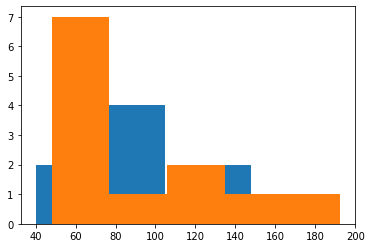

In [24]:
x = df['run_length'][df['group'] == 'tg']
y = df['run_length'][df['group'] == 'wt']

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

In [25]:
ols_resid = sm.ols('proximity_cue ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:          proximity_cue   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     2.345
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.140
Time:                        14:35:45   Log-Likelihood:                -127.98
No. Observations:                  24   AIC:                             260.0
Df Residuals:                      22   BIC:                             262.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      87.5027     15.097      5.796      

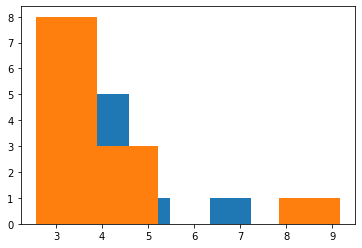

In [26]:
x = df['median_peak_vel'][df['group'] == 'tg']
y = df['median_peak_vel'][df['group'] == 'wt']

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

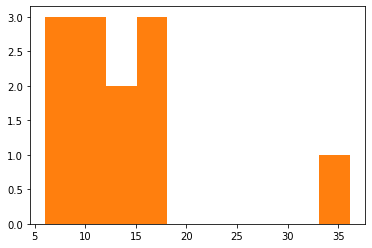

In [27]:
x = df['median_duration'][df['group'] == 'tg']
y = df['median_duration'][df['group'] == 'wt']

# Check distributions to see if they are similar 
plt.hist(x,10)
plt.hist(y,10)
plt.show()

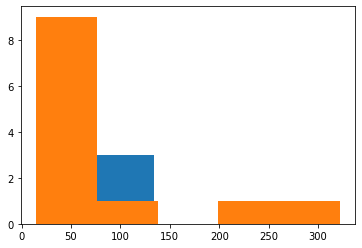

In [28]:
x = df['median_inter_run_interval'][df['group'] == 'tg']
y = df['median_inter_run_interval'][df['group'] == 'wt']

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

# Load movement epoch data and filter to day 2


In [29]:
fig_save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'movement_epochs.csv')
df = df[df.day=='D2']
df

,subID,group,day,circuity,num_runs,run_length,proximity_cue,median_peak_vel,median_duration,median_inter_run_interval
1,Tg102_D2,tg,D2,0.353526,5,53.438097,165.720291,3.278970,15.466667,232.283333
3,Tg103_D2,tg,D2,0.232223,10,81.750994,152.545849,3.022853,16.866667,31.666667
5,Tg104_D2,tg,D2,0.424583,15,48.035145,170.057057,3.358043,14.833333,55.383333
7,Tg105_D2,tg,D2,0.778707,16,137.742945,119.889028,5.605506,10.050000,22.066667
9,Tg106_D2,tg,D2,0.184416,5,142.389834,167.805779,5.567153,27.366667,74.466667
11,Tg108_D2,tg,D2,0.682284,11,52.369740,166.652896,5.417072,6.200000,24.300000
13,Tg109_D2,tg,D2,0.483659,10,84.469153,8.385821,4.820221,13.383333,22.500000
15,Tg110_D2,tg,D2,0.670008,17,61.564737,169.396632,3.562460,8.533333,44.083333
17,Tg111_D2,tg,D2,0.620467,33,139.493731,90.418037,3.352243,8.700000,27.816667
19,Tg112_D2,tg,D2,0.861026,25,117.897782,92.210949,3.926392,6.133333,19.800000


### Check assumptions

In [30]:
temp_df = df.loc[:,'circuity':'median_inter_run_interval']

for value in temp_df.keys():
    check_assumptions(df,value)



   Variable     N   Mean      SD      SE  95% Conf.  Interval
0  circuity  24.0  0.466  0.2377  0.0485     0.3656    0.5663
ShapiroResult(statistic=0.9450170397758484, pvalue=0.21079859137535095)
LeveneResult(statistic=0.019777890928297886, pvalue=0.8894388871088368)
KruskalResult(statistic=0.21333333333333826, pvalue=0.6441672226837063)


   Variable     N     Mean      SD      SE  95% Conf.  Interval
0  num_runs  24.0  13.6667  8.7211  1.7802     9.9841   17.3493
ShapiroResult(statistic=0.8984061479568481, pvalue=0.0199155043810606)
LeveneResult(statistic=0.13716660893661242, pvalue=0.714656055208065)
KruskalResult(statistic=0.01350954478707994, pvalue=0.907469811680383)


     Variable     N     Mean       SD      SE  95% Conf.  Interval
0  run_length  24.0  95.8836  43.1118  8.8002    77.6791  114.0881
ShapiroResult(statistic=0.8632313013076782, pvalue=0.0038873704615980387)
LeveneResult(statistic=0.3777807051379226, pvalue=0.545098470265442)
KruskalResult(statistic=0.40333333333

In [31]:
ols_resid = sm.ols('circuity ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:               circuity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.2282
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.638
Time:                        14:36:23   Log-Likelihood:                 1.0622
No. Observations:                  24   AIC:                             1.876
Df Residuals:                      22   BIC:                             4.232
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4895      0.070      7.014      

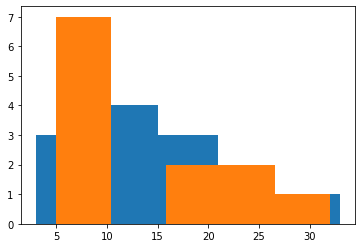

In [32]:
x = df['num_runs'][df['group'] == 'tg']
y = df['num_runs'][df['group'] == 'wt']
# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()


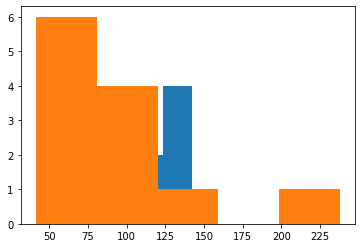

In [33]:
x = df['run_length'][df['group'] == 'tg']
y = df['run_length'][df['group'] == 'wt']

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

In [34]:
ols_resid = sm.ols('proximity_cue ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:          proximity_cue   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     3.863
Date:                Wed, 27 Jan 2021   Prob (F-statistic):             0.0621
Time:                        14:36:34   Log-Likelihood:                -125.38
No. Observations:                  24   AIC:                             254.8
Df Residuals:                      22   BIC:                             257.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     123.8539     13.549      9.141      

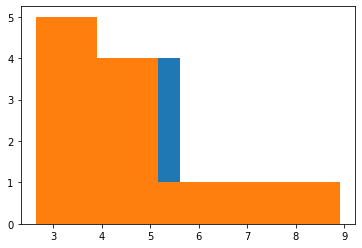

In [35]:
x = df['median_peak_vel'][df['group'] == 'tg']
y = df['median_peak_vel'][df['group'] == 'wt']
stats.kruskal(df['median_peak_vel'][df['group'] == 'tg'], df['median_peak_vel'][df['group'] == 'wt'])
# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

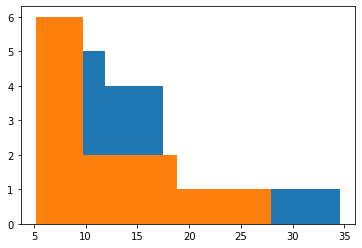

In [36]:
x = df['median_duration'][df['group'] == 'tg']
y = df['median_duration'][df['group'] == 'wt']
stats.kruskal(df['median_duration'][df['group'] == 'tg'], df['median_duration'][df['group'] == 'wt'])

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

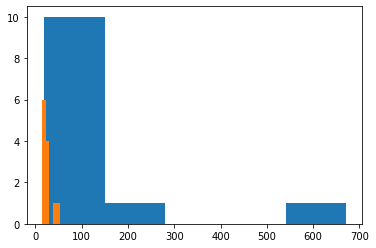

In [37]:
x = df['median_inter_run_interval'][df['group'] == 'tg']
y = df['median_inter_run_interval'][df['group'] == 'wt']
stats.kruskal(df['median_inter_run_interval'][df['group'] == 'tg'], df['median_inter_run_interval'][df['group'] == 'wt'])

# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

# Load stop epoch data and filter to day 1

In [53]:
fig_save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'stop_epochs.csv')
df = df[df.day=='D1']
df


,subID,group,day,num_stop,proximity_cue,median_duration,median_inter_stop_interval
0,Tg102_D1,tg,D1,87,97.202392,8.100000,15.233333
2,Tg103_D1,tg,D1,99,8.416834,4.900000,11.816667
4,Tg104_D1,tg,D1,91,153.288765,6.366667,12.416667
6,Tg105_D1,tg,D1,73,12.287812,6.333333,11.766667
8,Tg106_D1,tg,D1,65,173.521559,7.566667,15.233333
10,Tg108_D1,tg,D1,58,104.202825,5.750000,11.500000
12,Tg109_D1,tg,D1,72,12.792376,5.850000,14.700000
14,Tg110_D1,tg,D1,53,175.093654,6.500000,17.550000
16,Tg111_D1,tg,D1,87,3.314584,6.133333,13.516667
18,Tg112_D1,tg,D1,111,7.646169,5.200000,11.400000


### Check assumptions

In [54]:
temp_df = df.loc[:,'num_stop':'median_inter_stop_interval']

for value in temp_df.keys():
    check_assumptions(df,value)



   Variable     N    Mean       SD      SE  95% Conf.  Interval
0  num_stop  24.0  81.875  18.1451  3.7039     74.213    89.537
ShapiroResult(statistic=0.9604551196098328, pvalue=0.4476362466812134)
LeveneResult(statistic=0.21530335981536547, pvalue=0.6472006511801724)


        Variable     N     Mean       SD       SE  95% Conf.  Interval
0  proximity_cue  24.0  65.3277  72.3748  14.7735    34.7664   95.8889
ShapiroResult(statistic=0.855358898639679, pvalue=0.0027532330714166164)
LeveneResult(statistic=0.426507881400687, pvalue=0.5204747219721348)


          Variable     N    Mean     SD      SE  95% Conf.  Interval
0  median_duration  24.0  6.1528  1.252  0.2556     5.6241    6.6815
ShapiroResult(statistic=0.9226402044296265, pvalue=0.06682724505662918)
LeveneResult(statistic=0.10753103434958314, pvalue=0.7460730616760407)


                     Variable     N     Mean      SD      SE  95% Conf.  \
0  median_inter_stop_interval  24.0  13.4479  2.3828  0.4864    12.4417   

   Int

In [55]:
ols_resid = sm.ols('num_stop ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:               num_stop   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9108
Date:                Thu, 28 Jan 2021   Prob (F-statistic):              0.350
Time:                        15:22:31   Log-Likelihood:                -102.62
No. Observations:                  24   AIC:                             209.2
Df Residuals:                      22   BIC:                             211.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      78.3333      5.248     14.926      

In [57]:
x = df['proximity_cue'][df['group'] == 'tg']
y = df['proximity_cue'][df['group'] == 'wt']
stats.kruskal(df['proximity_cue'][df['group'] == 'tg'], df['proximity_cue'][df['group'] == 'wt'])


KruskalResult(statistic=1.2033333333333474, pvalue=0.2726564687949979)

In [56]:
ols_resid = sm.ols('median_duration ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:        median_duration   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.1276
Date:                Thu, 28 Jan 2021   Prob (F-statistic):              0.724
Time:                        15:24:48   Log-Likelihood:                -38.868
No. Observations:                  24   AIC:                             81.74
Df Residuals:                      22   BIC:                             84.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.0597      0.368     16.445      

In [58]:
x = df['median_inter_stop_interval'][df['group'] == 'tg']
y = df['median_inter_stop_interval'][df['group'] == 'wt']
stats.kruskal(df['median_inter_stop_interval'][df['group'] == 'tg'], df['median_inter_stop_interval'][df['group'] == 'wt'])


KruskalResult(statistic=0.21333333333333826, pvalue=0.6441672226837063)

# Load stop epoch data and filter to day 2

In [60]:
fig_save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'stop_epochs.csv')
df = df[df.day=='D2']
df


,subID,group,day,num_stop,proximity_cue,median_duration,median_inter_stop_interval
1,Tg102_D2,tg,D2,133,174.523218,5.333333,10.133333
3,Tg103_D2,tg,D2,83,158.496264,7.066667,14.066667
5,Tg104_D2,tg,D2,103,160.084755,5.733333,14.550000
7,Tg105_D2,tg,D2,64,168.706876,6.233333,13.600000
9,Tg106_D2,tg,D2,100,165.807590,4.233333,10.133333
11,Tg108_D2,tg,D2,75,173.554046,5.500000,14.183333
13,Tg109_D2,tg,D2,50,11.739570,8.533333,18.766667
15,Tg110_D2,tg,D2,78,172.439761,6.800000,12.300000
17,Tg111_D2,tg,D2,89,74.286541,5.400000,12.416667
19,Tg112_D2,tg,D2,57,123.610727,6.733333,13.583333


### Check assumptions

In [61]:
temp_df = df.loc[:,'num_stop':'median_inter_stop_interval']

for value in temp_df.keys():
    check_assumptions(df,value)



   Variable     N     Mean       SD     SE  95% Conf.  Interval
0  num_stop  24.0  85.0417  20.6639  4.218    76.3161   93.7673
ShapiroResult(statistic=0.9664329886436462, pvalue=0.5802509188652039)
LeveneResult(statistic=0.18736202531645557, pvalue=0.6693352056605831)


        Variable     N      Mean      SD       SE  95% Conf.  Interval
0  proximity_cue  24.0  121.9428  63.253  12.9115    95.2334  148.6522
ShapiroResult(statistic=0.8991930484771729, pvalue=0.020692968741059303)
LeveneResult(statistic=4.820350864933037, pvalue=0.03896642044120939)


          Variable     N    Mean      SD      SE  95% Conf.  Interval
0  median_duration  24.0  6.1667  1.4455  0.2951     5.5563     6.777
ShapiroResult(statistic=0.944423258304596, pvalue=0.2045285999774933)
LeveneResult(statistic=0.800507667407976, pvalue=0.38062627222152645)


                     Variable     N     Mean      SD      SE  95% Conf.  \
0  median_inter_stop_interval  24.0  13.2118  2.4608  0.5023    12.1727   

   Int

In [62]:
ols_resid = sm.ols('num_stop ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:               num_stop   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.2455
Date:                Thu, 28 Jan 2021   Prob (F-statistic):              0.625
Time:                        15:25:48   Log-Likelihood:                -106.09
No. Observations:                  24   AIC:                             216.2
Df Residuals:                      22   BIC:                             218.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      82.9167      6.065     13.670      

In [63]:
x = df['proximity_cue'][df['group'] == 'tg']
y = df['proximity_cue'][df['group'] == 'wt']
stats.kruskal(df['proximity_cue'][df['group'] == 'tg'], df['proximity_cue'][df['group'] == 'wt'])


KruskalResult(statistic=1.0799999999999983, pvalue=0.29869755599496756)

In [64]:
ols_resid = sm.ols('median_duration ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:        median_duration   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.3043
Date:                Thu, 28 Jan 2021   Prob (F-statistic):              0.587
Time:                        15:26:14   Log-Likelihood:                -42.222
No. Observations:                  24   AIC:                             88.44
Df Residuals:                      22   BIC:                             90.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.3319      0.424     14.943      

In [65]:
ols_resid = sm.ols('median_inter_stop_interval ~ group',data = df).fit()
print(ols_resid.summary())

                                OLS Regression Results                                
Dep. Variable:     median_inter_stop_interval   R-squared:                       0.026
Model:                                    OLS   Adj. R-squared:                 -0.019
Method:                         Least Squares   F-statistic:                    0.5779
Date:                        Thu, 28 Jan 2021   Prob (F-statistic):              0.455
Time:                                15:26:21   Log-Likelihood:                -54.844
No. Observations:                          24   AIC:                             113.7
Df Residuals:                              22   BIC:                             116.0
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

## Load Data for home base metrics 

In [19]:
fig_save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'home_bases.csv')
df = df[df.day=='D1']
df = df.dropna()
df

,subID,group,day,duration,avg_dist_between_HB,distance_to_cue,stop_distance,num_close_stops,num_stops,time_to_HB,num_of_HB
0,Tg102_D1,tg,D1,736.200000,10.646954,96.862691,17.082471,62.0,27.0,1064.633333,3
2,Tg103_D1,tg,D1,729.133333,104.188874,5.377029,5.539127,99.0,39.0,61.100000,2
4,Tg104_D1,tg,D1,696.833333,18.497609,142.659798,19.918659,59.0,41.0,266.666667,4
6,Tg105_D1,tg,D1,1240.966667,106.088046,11.591254,5.138203,70.0,46.0,79.433333,1
8,Tg106_D1,tg,D1,722.666667,124.895158,177.963338,17.612006,49.0,16.0,556.233333,3
10,Tg108_D1,tg,D1,536.833333,58.333383,157.824653,53.308220,19.0,7.0,148.500000,3
12,Tg109_D1,tg,D1,641.666667,13.212617,96.449331,65.598516,23.0,9.0,271.466667,2
14,Tg110_D1,tg,D1,852.833333,105.689127,174.976494,22.048616,40.0,17.0,57.533333,2
16,Tg111_D1,tg,D1,895.133333,131.413471,2.706238,9.635179,76.0,29.0,83.566667,1
18,Tg112_D1,tg,D1,790.466667,105.879382,11.218559,40.892056,79.0,37.0,388.233333,2


In [20]:
temp_df = df.loc[:,'duration':'num_of_HB']

for value in temp_df.keys():
    check_assumptions(df,value)



   Variable     N   Mean        SD       SE  95% Conf.  Interval
0  duration  23.0  795.7  264.1539  55.0799   681.4713  909.9287
ShapiroResult(statistic=0.914888858795166, pvalue=0.051828205585479736)
LeveneResult(statistic=2.0872980979091778, pvalue=0.16328533098641101)


              Variable     N     Mean       SD      SE  95% Conf.  Interval
0  avg_dist_between_HB  23.0  93.2869  38.8384  8.0984     76.492  110.0819
ShapiroResult(statistic=0.957671582698822, pvalue=0.41800135374069214)
LeveneResult(statistic=17.6078369204751, pvalue=0.00040647485518653106)


          Variable     N     Mean       SD       SE  95% Conf.  Interval
0  distance_to_cue  23.0  76.1671  75.5605  15.7554    43.4923  108.8419
ShapiroResult(statistic=0.9004956483840942, pvalue=0.02588176168501377)
LeveneResult(statistic=0.25094292052887784, pvalue=0.6216221530869375)


        Variable     N    Mean       SD      SE  95% Conf.  Interval
0  stop_distance  23.0  29.199  26.9395  5.6173    17.5495   40.84

## Perform ANOVA for variables that met assumptions 

In [22]:
ols_resid = sm.ols('duration ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.5439
Date:                Mon, 01 Feb 2021   Prob (F-statistic):              0.469
Time:                        15:25:51   Log-Likelihood:                -160.09
No. Observations:                  23   AIC:                             324.2
Df Residuals:                      21   BIC:                             326.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     756.4000     77.058      9.816      

In [11]:
ols_resid = sm.ols('num_close_stops ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:              num_stops   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2.493
Date:                Mon, 01 Feb 2021   Prob (F-statistic):              0.129
Time:                        15:22:06   Log-Likelihood:                -93.947
No. Observations:                  23   AIC:                             191.9
Df Residuals:                      21   BIC:                             194.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.0833      4.344      5.544      

## Run Kruskal for measures that didn't meet parametric assumptions
(avg_dist_between_HB,distance_to_cue,stop_distance,time_to_HB,num_of_HB)

Average distance between home bases
KruskalResult(statistic=5.76136363636364, pvalue=0.01638235277370589)


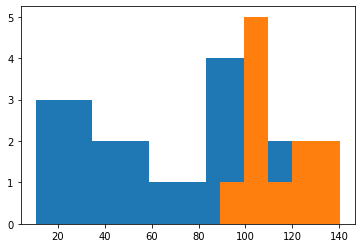

Average home base distance from cue
KruskalResult(statistic=1.0946969696969688, pvalue=0.29543285043931244)


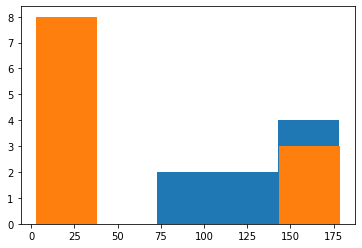

Average home base distance from a stop
KruskalResult(statistic=0.09469696969696884, pvalue=0.7582887584332119)


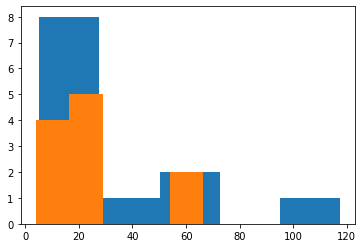

Time to home base (s)
KruskalResult(statistic=0.3068181818181728, pvalue=0.5796392710816612)


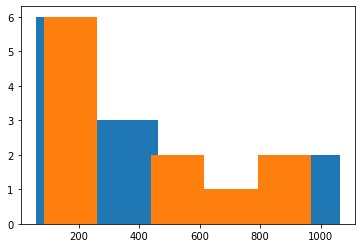

Number of home bases
KruskalResult(statistic=0.9334415584415499, pvalue=0.33397023217790545)


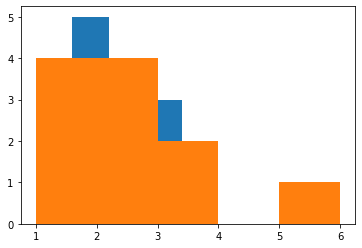

2.0 2.0
Number of stops in home bases
KruskalResult(statistic=1.5926429395287545, pvalue=0.2069489375632833)


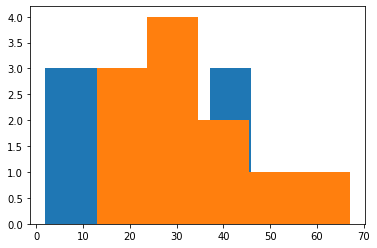

23.0 31.0


In [31]:
print('Average distance between home bases')
print(stats.kruskal(df['avg_dist_between_HB'][df['group'] == 'tg'], df['avg_dist_between_HB'][df['group'] == 'wt']))
x = df['avg_dist_between_HB'][df['group'] == 'tg']
y = df['avg_dist_between_HB'][df['group'] == 'wt']
# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

print('Average home base distance from cue')
print(stats.kruskal(df['distance_to_cue'][df['group'] == 'tg'], df['distance_to_cue'][df['group'] == 'wt']))
x = df['distance_to_cue'][df['group'] == 'tg']
y = df['distance_to_cue'][df['group'] == 'wt']
# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

print('Average home base distance from a stop')
print(stats.kruskal(df['stop_distance'][df['group'] == 'tg'], df['stop_distance'][df['group'] == 'wt']))
x = df['stop_distance'][df['group'] == 'tg']
y = df['stop_distance'][df['group'] == 'wt']
# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

print('Time to home base (s)')
print(stats.kruskal(df['time_to_HB'][df['group'] == 'tg'], df['time_to_HB'][df['group'] == 'wt']))
x = df['time_to_HB'][df['group'] == 'tg']
y = df['time_to_HB'][df['group'] == 'wt']
# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()

print('Number of home bases')
print(stats.kruskal(df['num_of_HB'][df['group'] == 'tg'], df['num_of_HB'][df['group'] == 'wt']))
x = df['num_of_HB'][df['group'] == 'tg']
y = df['num_of_HB'][df['group'] == 'wt']
# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()
print(np.median(x),np.median(y))


print('Number of stops in home bases')
print(stats.kruskal(df['num_stops'][df['group'] == 'tg'], df['num_stops'][df['group'] == 'wt']))
x = df['num_stops'][df['group'] == 'tg']
y = df['num_stops'][df['group'] == 'wt']
# Check distributions to see if they are similar 
plt.hist(x,5)
plt.hist(y,5)
plt.show()
print(np.median(x),np.median(y))


# Older data below

In [ ]:
# PATH LENGTH 

# Gettin summary statistics
print(rp.summary_cont(df["path_length"]))

# Build ANOVA model 
ols_resid = sm.ols('path_length ~ group',data = df).fit()

# Test assumption of normality for residuals 
print(stats.shapiro(ols_resid.resid))

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
print(stats.levene(df['path_length'][df['group'] == 'tg'],
             df['path_length'][df['group'] == 'wt']))

# Given Residuals were not normally distributed, run a Kruskal-Wallis test 
print(stats.kruskal(df['path_length'][df['group'] == 'tg'],  df['path_length'][df['group'] == 'wt']))

# Provide median 
print(np.median((df['path_length'][df['group'] == 'tg'])))
print(np.median((df['path_length'][df['group'] == 'wt'])))


# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="path_length", kind="violin", data=df)
sns.swarmplot(x="group", y="path_length", color="k", size=10, data=df, ax=g.ax)

In [ ]:
################ SEARCH AREA ##################################

# Gettin summary statistics
rp.summary_cont(df["searchArea_diff"])

# Build ANOVA model 
ols_resid = sm.ols('searchArea_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['searchArea_diff'][df['group'] == 'Tg'],
             df['searchArea_diff'][df['group'] == 'Wt'])

#ANOVA assumptions were met
table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

np.mean((df['searchArea_diff'][df['group'] == 'Tg']))
np.mean((df['searchArea_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="searchArea_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="searchArea_diff", color="k", size=10, data=df, ax=g.ax);


In [ ]:
################ Running Speed ##################################

# Gettin summary statistics
rp.summary_cont(df["runSpeed_diff"])

# Build ANOVA model 
ols_resid = sm.ols('runSpeed_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['runSpeed_diff'][df['group'] == 'Tg'],
             df['runSpeed_diff'][df['group'] == 'Wt'])

#ANOVA assumptions were met
table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

np.mean((df['runSpeed_diff'][df['group'] == 'Tg']))
np.mean((df['runSpeed_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="runSpeed_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="runSpeed_diff", color="k", size=10, data=df, ax=g.ax);

In [ ]:
################ running Angular Velocity ##################################

# Gettin summary statistics
rp.summary_cont(df["runAngVel_diff"])

# Build ANOVA model 
ols_resid = sm.ols('runAngVel_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['runAngVel_diff'][df['group'] == 'Tg'],
             df['runAngVel_diff'][df['group'] == 'Wt'])

#ANOVA assumptions were met
table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

np.mean((df['runAngVel_diff'][df['group'] == 'Tg']))
np.mean((df['runAngVel_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="runAngVel_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="runAngVel_diff", color="k", size=10, data=df, ax=g.ax);


In [ ]:
################ stop Angular Velocity ##################################

# Gettin summary statistics
rp.summary_cont(df["stopAngVel_diff"])

# Build ANOVA model 
ols_resid = sm.ols('stopAngVel_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['stopAngVel_diff'][df['group'] == 'Tg'],
             df['stopAngVel_diff'][df['group'] == 'Wt'])

# Given Homogeneity of variance was not met, run a Kruskal-Wallis test 
stats.kruskal(df['stopAngVel_diff'][df['group'] == 'Tg'],  df['stopAngVel_diff'][df['group'] == 'Wt'])

# Provide median 
np.median((df['stopAngVel_diff'][df['group'] == 'Tg']))
np.median((df['stopAngVel_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="stopAngVel_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="stopAngVel_diff", color="k", size=10, data=df, ax=g.ax);

In [ ]:
################ number of runs  ##################################

# Gettin summary statistics
rp.summary_cont(df["numRuns_diff"])

# Build ANOVA model 
ols_resid = sm.ols('numRuns_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['numRuns_diff'][df['group'] == 'Tg'],
             df['numRuns_diff'][df['group'] == 'Wt'])

# Given residuals were not normal, run a Kruskal-Wallis test 
stats.kruskal(df['numRuns_diff'][df['group'] == 'Tg'],  df['numRuns_diff'][df['group'] == 'Wt'])

# Provide median 
np.median((df['numRuns_diff'][df['group'] == 'Tg']))
np.median((df['numRuns_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="numRuns_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="numRuns_diff", color="k", size=10, data=df, ax=g.ax);

In [ ]:
################ number of stops ##################################

# Gettin summary statistics
rp.summary_cont(df["numStops_diff"])

# Build ANOVA model 
ols_resid = sm.ols('numStops_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['numStops_diff'][df['group'] == 'Tg'],
             df['numStops_diff'][df['group'] == 'Wt'])

table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

np.mean((df['numStops_diff'][df['group'] == 'Tg']))
np.mean((df['numStops_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="numStops_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="numStops_diff", color="k", size=10, data=df, ax=g.ax);

In [ ]:
################ Cue Zone Entries ##################################

# Gettin summary statistics
rp.summary_cont(df["CueEntries_diff"])

# Build ANOVA model 
ols_resid = sm.ols('CueEntries_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['CueEntries_diff'][df['group'] == 'Tg'],
             df['CueEntries_diff'][df['group'] == 'Wt'])

# Given residuals were not normal, run a Kruskal-Wallis test 
stats.kruskal(df['CueEntries_diff'][df['group'] == 'Tg'],  df['CueEntries_diff'][df['group'] == 'Wt'])

# Provide median 
np.median((df['CueEntries_diff'][df['group'] == 'Tg']))
np.median((df['CueEntries_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="CueEntries_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="CueEntries_diff", color="k", size=10, data=df, ax=g.ax);

In [ ]:
################ Cue Zone Dwell ##################################

# Gettin summary statistics
rp.summary_cont(df["cue_dwell_diff"])

# Build ANOVA model 
ols_resid = sm.ols('cue_dwell_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['cue_dwell_diff'][df['group'] == 'Tg'],
             df['cue_dwell_diff'][df['group'] == 'Wt'])

table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

np.mean((df['cue_dwell_diff'][df['group'] == 'Tg']))
np.mean((df['cue_dwell_diff'][df['group'] == 'Wt']))

In [ ]:
################ run Acceleration  ##################################

# Gettin summary statistics
rp.summary_cont(df["runAcell_diff"])

# Build ANOVA model 
ols_resid = sm.ols('runAcell_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['runAcell_diff'][df['group'] == 'Tg'],
             df['runAcell_diff'][df['group'] == 'Wt'])

table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

# Provide median 
np.mean((df['runAcell_diff'][df['group'] == 'Tg']))
np.mean((df['runAcell_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="runAcell_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="runAcell_diff", color="k", size=10, data=df, ax=g.ax);



In [ ]:
# Loading data
df = pd.read_csv(data_path + 'wholeTrial_measures.csv')

# df = pd.read_csv(r"D:\Users\BClarkLab\Google Drive (lberkowitz@unm.edu)\Manuscripts\In Progress\TgF344-AD_OF\Data\wholeTrial_measures.csv")
df_day2 = df[df['day']=='D2']

In [ ]:
######################## Total Cue Entries Day 2 #############################
# Gettin summary statistics
rp.summary_cont(df_day2["CueEntries"])

# Build ANOVA model 
ols_resid = sm.ols('CueEntries ~ group',data = df_day2).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df_day2['CueEntries'][df_day2['group'] == 'Tg'],
             df_day2['CueEntries'][df_day2['group'] == 'Wt'])

# Given residuals were not normal, run a Kruskal-Wallis test 
stats.kruskal(df_day2['CueEntries'][df_day2['group'] == 'Tg'],  df_day2['CueEntries'][df_day2['group'] == 'Wt'])

# Provide median 
np.median((df_day2['CueEntries'][df_day2['group'] == 'Tg']))
np.median((df_day2['CueEntries'][df_day2['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="CueEntries", kind="violin", data=df_day2)
sns.swarmplot(x="group", y="CueEntries", color="k", size=10, data=df_day2, ax=g.ax);



In [ ]:
df = pd.read_csv(data_path + 'wholeTrial_measures.csv')

# df = pd.read_csv(r"D:\Users\BClarkLab\Google Drive (lberkowitz@unm.edu)\Manuscripts\In Progress\TgF344-AD_OF\Data\wholeTrial_measures.csv")
df_day2 = df[df['day']=='D2']

In [ ]:
###### Cue Stops day 2

# Gettin summary statistics
rp.summary_cont(df_day2["CueStops"])

# Build ANOVA model 
ols_resid = sm.ols('CueStops ~ group',data = df_day2).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df_day2['CueStops'][df_day2['group'] == 'Tg'],
             df_day2['CueStops'][df_day2['group'] == 'Wt'])

# Given residuals were not normal, run a Kruskal-Wallis test 
stats.kruskal(df_day2['CueStops'][df_day2['group'] == 'Tg'],  df_day2['CueStops'][df_day2['group'] == 'Wt'])

# Provide median 
np.median((df_day2['CueStops'][df_day2['group'] == 'Tg']))
np.median((df_day2['CueStops'][df_day2['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="CueEntries", kind="violin", data=df_day2)
sns.swarmplot(x="group", y="CueEntries", color="k", size=10, data=df_day2, ax=g.ax);


In [ ]:
###### Primary HB dist
df = pd.read_csv(data_path + 'HBdist.csv')

# df = pd.read_csv(r"D:\Users\BClarkLab\Google Drive (lberkowitz@unm.edu)\Manuscripts\In Progress\TgF344-AD_OF\Data\HBdist.csv")


In [ ]:

# Gettin summary statistics
rp.summary_cont(df["primaryHBdist"])

# Build ANOVA model 
ols_resid = sm.ols('primaryHBdist ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['primaryHBdist'][df['group'] == 'Tg'],
             df['primaryHBdist'][df['group'] == 'Wt'])

# Given residuals were not normal, run a Kruskal-Wallis test 
stats.kruskal(df['primaryHBdist'][df['group'] == 'Tg'],  df['primaryHBdist'][df['group'] == 'Wt'])

# Provide median 
np.median((df['primaryHBdist'][df['group'] == 'Tg']))
np.median((df['primaryHBdist'][df['group'] == 'Wt']))